In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import nltk
from nltk.corpus import stopwords
import string
from time import time
import pickle
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model, load_model
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import img_to_array
# from keras.layers import Input, Dense, Dropout, Embedding, LSTM
# from keras.layers.merge import add



In [ ]:
!pip install gTTS
from gtts import gTTS
from IPython.display import Audio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
f = open("/content/drive/MyDrive/mini_project2/archive/archive/icggit2/icgp3/wordtoidx.pkl", "rb")
word_to_idx = pickle.load(f)
f.close()

In [ ]:
f = open("/content/drive/MyDrive/mini_project2/archive/archive/icggit2/icgp3/idxtoword.pkl", "rb")
idx_to_word = pickle.load(f)
f.close()

In [ ]:
def preprocess_img(img):
    img = keras.utils.load_img(img,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img,axis=0)
    # Normalisation
    img = preprocess_input(img)
    return img

In [ ]:
def encode_image(img):
    img = preprocess_img(img)
    feature_vector = model_new.predict(img)
    
    feature_vector = feature_vector.reshape((-1,))
    #print(feature_vector.shape)
    return feature_vector


In [ ]:
model = ResNet50(weights="imagenet",input_shape=(224,224,3))
model_new = Model(model.input,model.layers[-2].output)

In [ ]:
model = load_model('/content/drive/MyDrive/mini_project2/archive/archive/icggit2/icgp3/model_9.h5')

In [ ]:
def predict_caption(photo):
    max_len = 35
    in_text = "startseq"
    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence],maxlen=max_len,padding='post')
        
        ypred = model.predict([photo,sequence])
        
        ypred = ypred.argmax() #WOrd with max prob always - Greedy Sampling
        word = idx_to_word[ypred]
        
        in_text += (' ' + word)
        
        if word == "endseq":
            break
    
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

In [ ]:
from nltk.translate.bleu_score import corpus_bleu


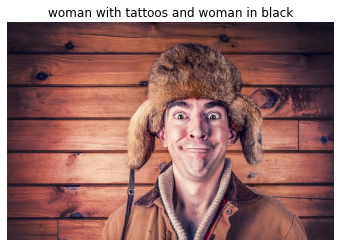

In [ ]:
photo = encode_image('/content/ex2.jpeg')

photo = photo.reshape(1,2048)

caption = predict_caption(photo)

i = plt.imread("/content/ex2.jpeg")
plt.title(caption)
tts=gTTS(caption)
tts.save('1.wav')
sound_file='1.wav'
Audio(sound_file,autoplay=True)

plt.imshow(i)
plt.axis("off")
plt.show()

In [ ]:
reference = {}
for name in test:
    reference[name] = descriptions[name]
    
print(len(reference.keys()))

NameError: ignored

In [ ]:
# test
# len(reference)
count = 0
testing = {}
for i,j in encoding_test.items():
    photo = j.reshape((1,2048))
    caption = predict_caption(photo)
    testing[i] = caption
    count = count+1
    if count%100 == 0:
        print("Captioning generation in progress.. ", count)
    
    
# print(testing)
print(count)

NameError: ignored

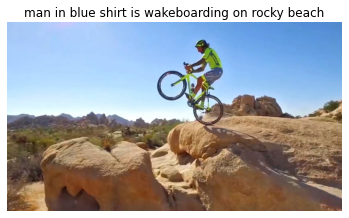

In [ ]:
photo = encode_image('/content/ex3.jpeg')

photo = photo.reshape(1,2048)

caption = predict_caption(photo)

i = plt.imread("/content/ex3.jpeg")
plt.title(caption)
plt.imshow(i)
plt.axis("off")
plt.show()

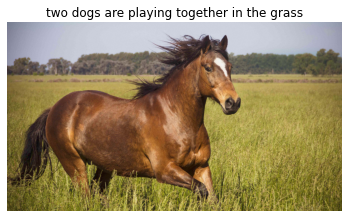

In [ ]:
photo = encode_image('/content/ex1.jpeg')

photo = photo.reshape(1,2048)

caption = predict_caption(photo)

i = plt.imread("/content/ex1.jpeg")
plt.title(caption)
plt.imshow(i)
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 34ms/step


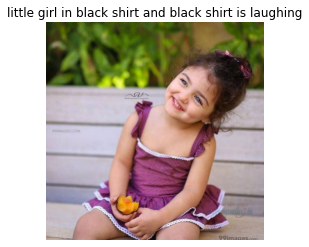

In [57]:
photo = encode_image('/content/girl.jpg')

photo = photo.reshape(1,2048)

caption = predict_caption(photo)

i = plt.imread("/content/girl.jpg")
plt.title(caption)
plt.imshow(i)
plt.axis("off")
plt.show(4)

1/1 [==============================] - 0s 40ms/step


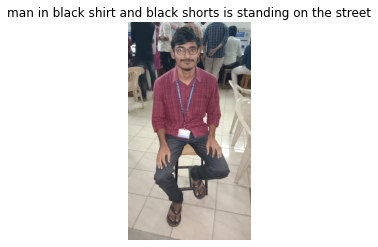

In [56]:
photo = encode_image('/content/WhatsApp Image 2022-11-03 at 16.08.00.jpg')

photo = photo.reshape(1,2048)

caption = predict_caption(photo)

i = plt.imread("/content/WhatsApp Image 2022-11-03 at 16.08.00.jpg")
plt.title(caption)
plt.imshow(i)
plt.axis("off")
plt.show(4)